In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'cleaned_wikiHow_data.csv'

In [2]:
# Read data from CSV file into a DataFrame
data = pd.read_csv(file_path)

data_subset = data.head(600)

G_visualise = nx.Graph()

(-1.0456242522597312,
 1.1024494728446008,
 -0.9500045537948608,
 1.1852944850921632)

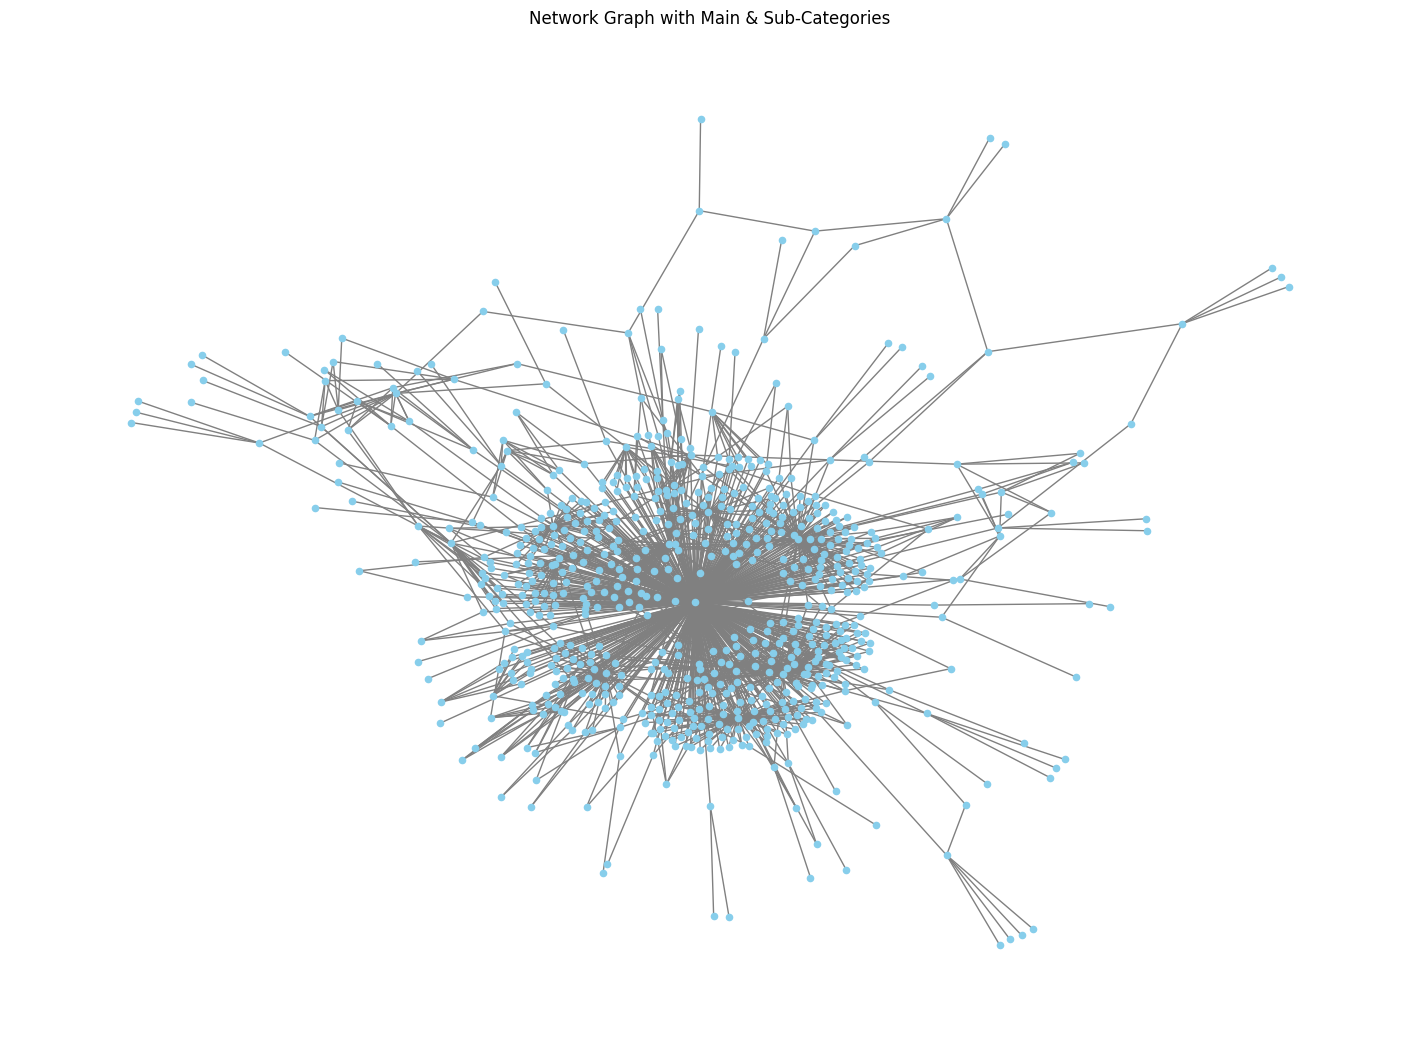

In [4]:
# Code to Process data to include both 'Main Category' and 'Sub-Category' 
for index, row in data_subset.iterrows():
    main_heading = row["Main Heading"]
    categories = [row["Main category"]] + str(row["Sub-category"]).split(", ")


    G_visualise.add_node(main_heading, node_type='Main Heading')

 
    for category in categories:
        if category and category != 'nan': 
            if category not in G_visualise:
                G_visualise.add_node(category, node_type='Category')
            G_visualise.add_edge(main_heading, category)


plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_visualise, seed=42)  
nx.draw(G_visualise, pos, with_labels=False, node_size=20, font_size=10, 
        node_color='skyblue', edge_color='gray')
plt.title('Network Graph with Main & Sub-Categories')
plt.axis('off')  

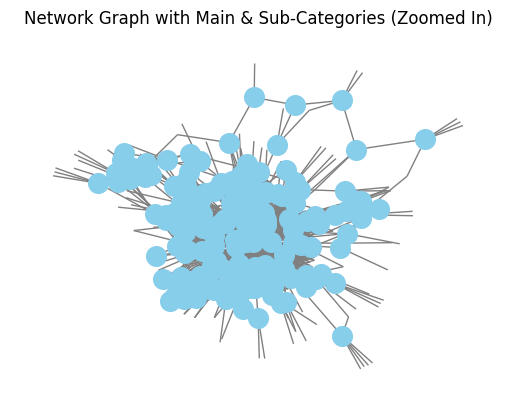

In [15]:

major_nodes = [node for node, degree in G_visualise.degree() if degree >= 3]

pos = nx.spring_layout(G_visualise, seed=42)

nx.draw_networkx_nodes(G_visualise, pos, nodelist=major_nodes, node_size=200, node_color='skyblue')
# Drawing edges
nx.draw_networkx_edges(G_visualise, pos, edge_color='gray')

# Drawing edge labels
edge_labels = {tuple(edge): ', '.join(G_visualise[edge[0]][edge[1]].get('relation', [])) for edge in G_visualise.edges()}
plt.title('Network Graph with Main & Sub-Categories (Zoomed In)')
plt.axis('off') 
plt.show()

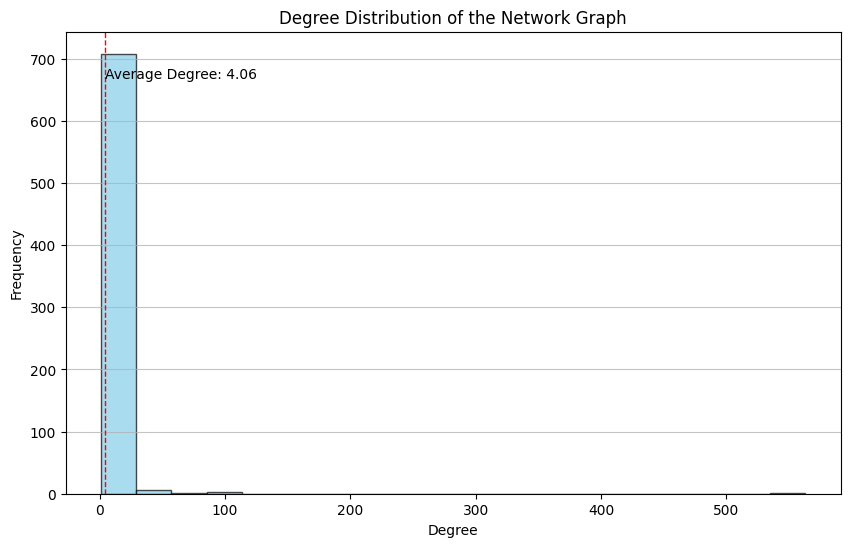

In [17]:

degree_sequence = [d for n, d in G_visualise.degree()]
average_degree = sum(degree_sequence) / len(degree_sequence)


plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Degree Distribution of the Network Graph')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)


plt.axvline(average_degree, color='red', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(average_degree*1.1, max_ylim*0.9, f'Average Degree: {average_degree:.2f}')

plt.show()

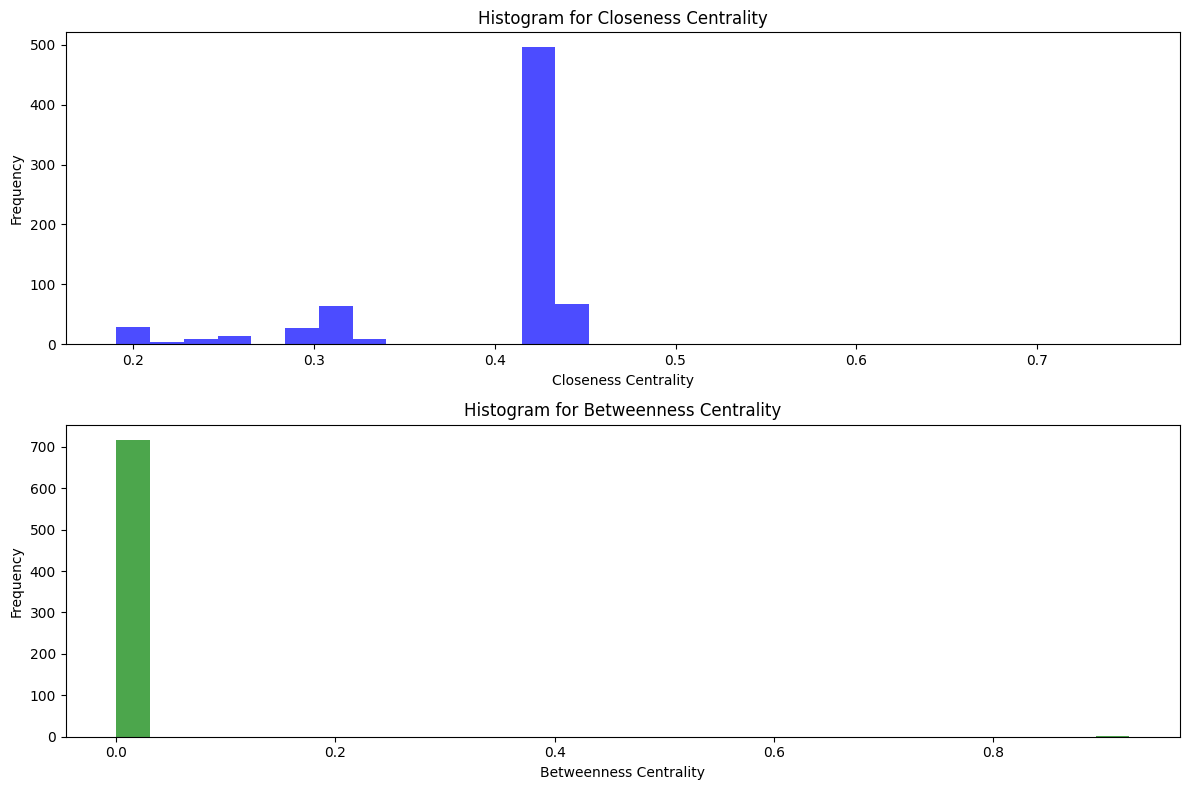

Diameter: 8
Top 5 nodes by PageRank: [('Computers and Electronics', 0.17356994275010007), ('Internet', 0.03194385545070221), ('Basic Computer Skills', 0.027542551071858105), ('Software', 0.023938305718603604), ('Computer Networking', 0.01700734133015966)]


In [18]:

pagerank = nx.pagerank(G_visualise)


try:
    diameter = nx.diameter(G_visualise)
except nx.NetworkXError as e:
    diameter = "Graph is not connected; diameter is undefined."
    print(e)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G_visualise)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G_visualise)


plt.figure(figsize=(12, 8))

# Histogram for Closeness Centrality
plt.subplot(2, 1, 1)
plt.hist(list(closeness_centrality.values()), bins=30, color='blue', alpha=0.7)
plt.title('Histogram for Closeness Centrality')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

# Histogram for Betweenness Centrality
plt.subplot(2, 1, 2)
plt.hist(list(betweenness_centrality.values()), bins=30, color='green', alpha=0.7)
plt.title('Histogram for Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

top_5_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]

print("Diameter:", diameter)
print("Top 5 nodes by PageRank:", top_5_pagerank)


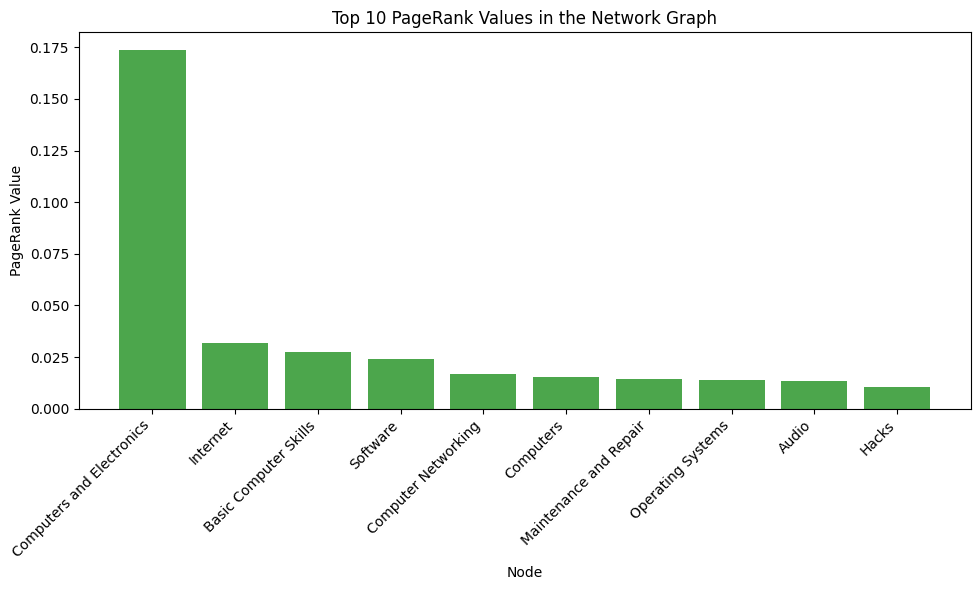

In [11]:
top_10_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
top_nodes, top_values = zip(*top_10_pagerank)


plt.figure(figsize=(10, 6))
plt.bar(top_nodes, top_values, color='green', alpha=0.7)
plt.xlabel('Node')
plt.ylabel('PageRank Value')
plt.title('Top 10 PageRank Values in the Network Graph')
plt.xticks(rotation=45, ha="right")

plt.tight_layout() 
plt.show()